In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from MIOFlow.datasets import make_dying_example_unif

In [ ]:
df = make_dying_example_unif()

In [4]:
from MIOFlow.models import GrowthRateModel
gmodel = GrowthRateModel(feature_dims=2, condition_dims=1, layers=[64,64], activation='ReLU', use_time=True)

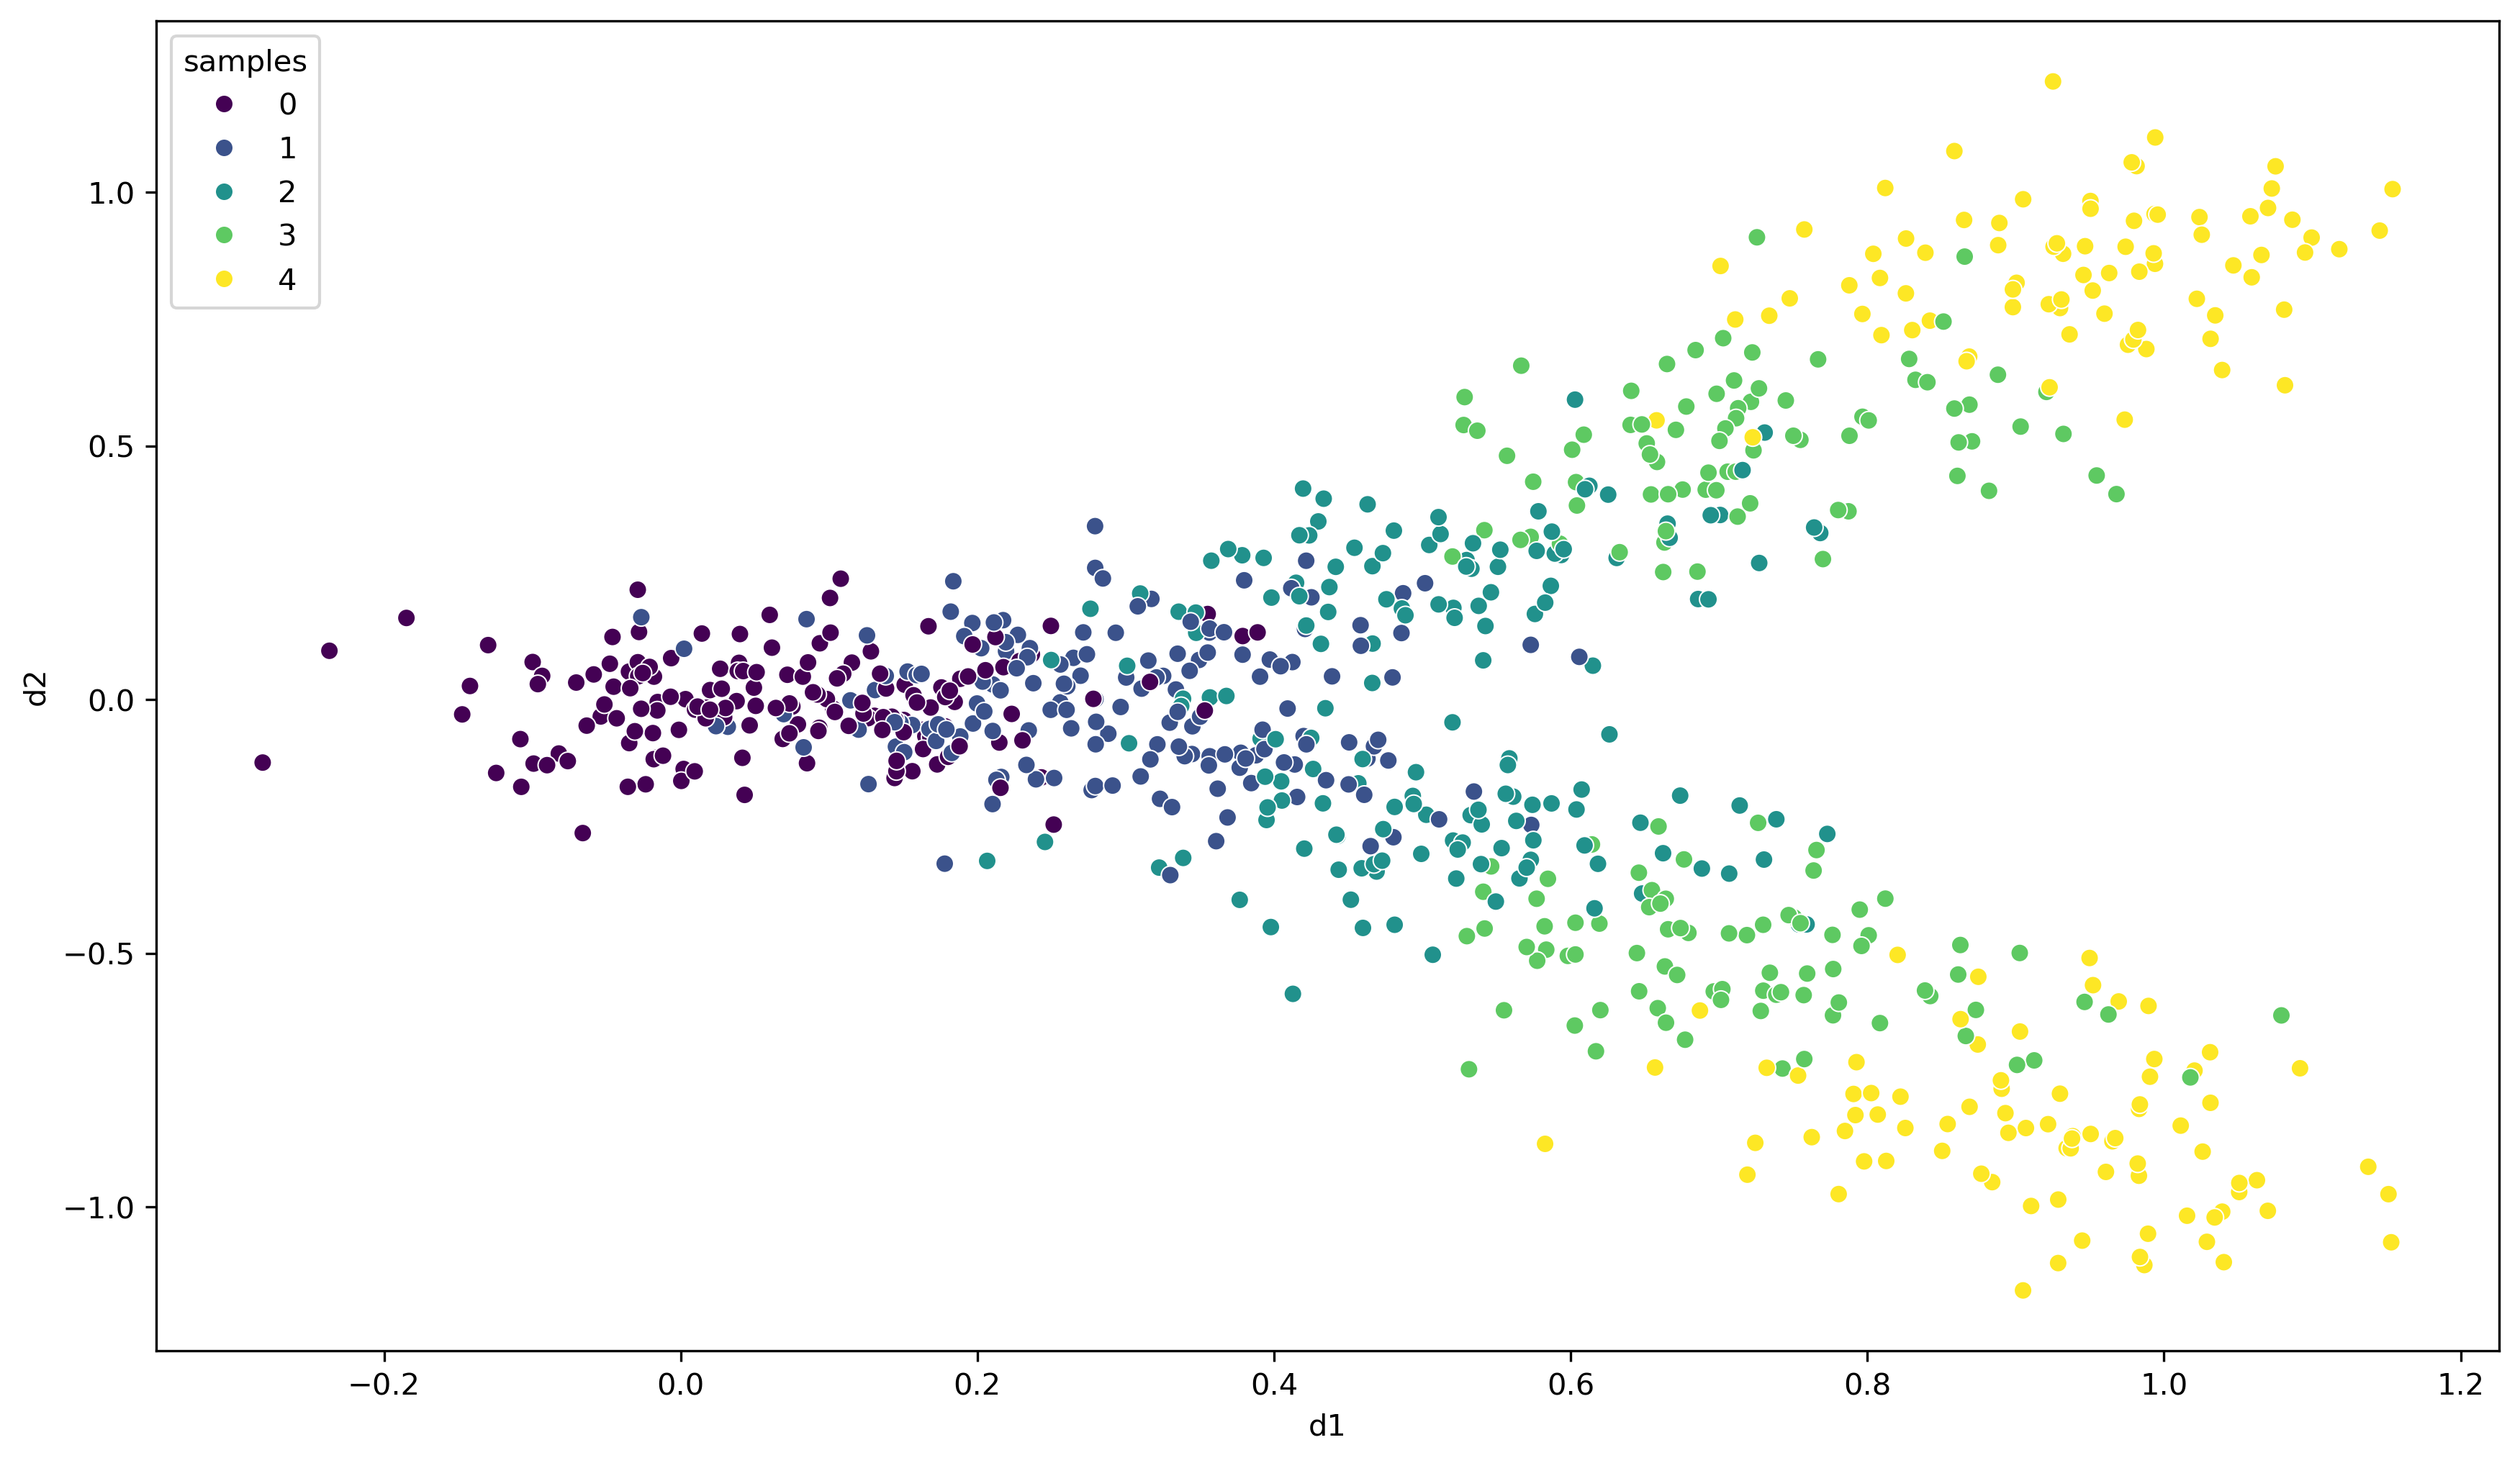

In [9]:
fig = plt.figure(figsize=(14, 8), dpi=300)
sns.scatterplot(data=df, x='d1', y='d2', hue='samples', palette='viridis');

In [10]:
df_copy = df.copy()
means = df[['d1', 'd2']].mean(axis=0)
stds = df[['d1', 'd2']].std(axis=0)
df[['d1', 'd2']] = (df[['d1', 'd2']] - means) / stds

In [11]:
import ot

In [ ]:
reg_m_l2 = [0.01, 100_000]
x0, x1 = df[df['samples'] == 0.0], df[df['samples'] == 1.0]
m, n = ot.unif(len(x0)), ot.unif(len(x1))
M = ot.dist(x0, x1)
ot.unbalanced.mm_unbalanced(m, n, M, reg_m_l2, div='l2')